In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

%load_ext autoreload
%autoreload 2


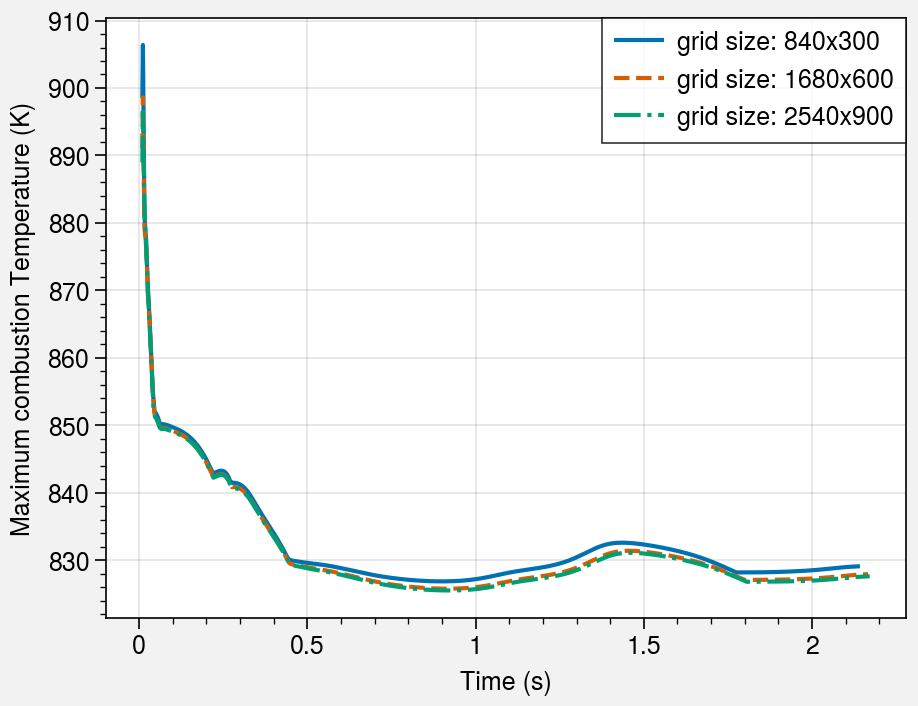

In [2]:
TmaxFile0="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/gridSizeSensitivityAnalysis/T773_Pe1e-2_medium_rawMesh/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"
TmaxFile1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/gridSizeSensitivityAnalysis/T773_Pe1e-2_medium_finer2/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"
TmaxFile2="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/gridSizeSensitivityAnalysis/T773_Pe1e-2_medium_finer3/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"
sampling_rate=10

data_sampling0=pyFigure.read_min_max_field(TmaxFile0,sampling_rate,f'^T')
data_sampling1=pyFigure.read_min_max_field(TmaxFile1,sampling_rate,f'^T')
data_sampling2=pyFigure.read_min_max_field(TmaxFile2,sampling_rate,f'^T')

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(data_sampling0["Time"],data_sampling0["max"],label=f"grid size: 840x300",linestyle='-')
ax.plot(data_sampling1["Time"],data_sampling1["max"],label=f"grid size: 1680x600",linestyle='--')
ax.plot(data_sampling2["Time"],data_sampling2["max"],label=f"grid size: 2540x900",linestyle='-.')
ax.format(ylabel="Maximum combustion Temperature (K)", xlabel="Time (s)")
ax.legend(ncol=1)

In [3]:
fig.savefig("MaxCombustionTemperature.jpg",bbox_inches='tight')

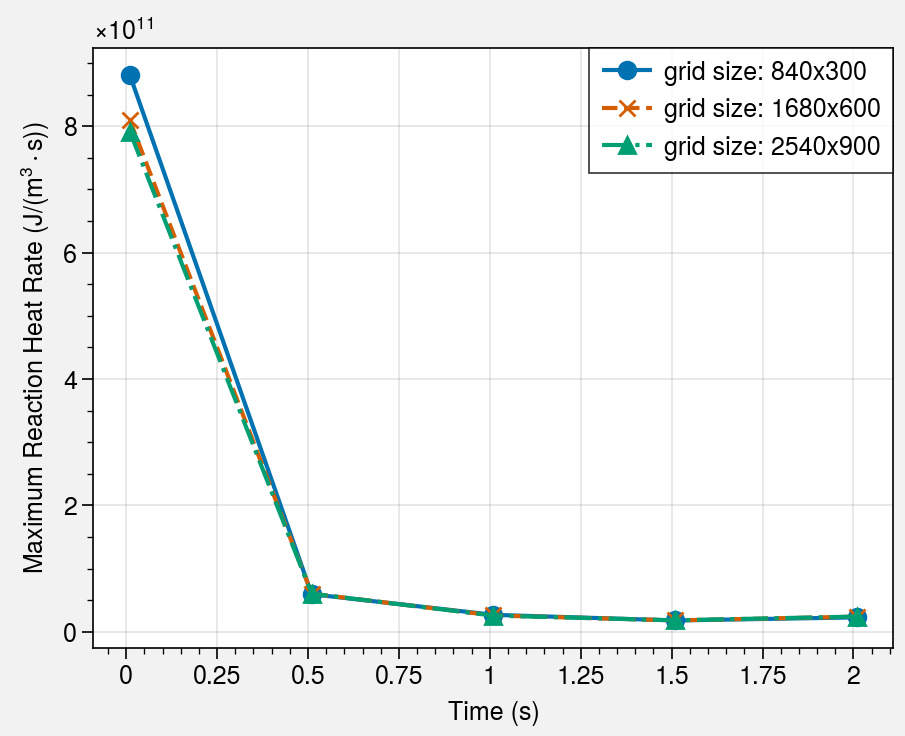

In [4]:
otherMaxFile0="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/gridSizeSensitivityAnalysis/T773_Pe1e-2_medium_rawMesh/postProcessing/minMaxComponents2/2.01/fieldMinMax.dat"
otherMaxFile1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/gridSizeSensitivityAnalysis/T773_Pe1e-2_medium_finer2/postProcessing/minMaxComponents2/2.01/fieldMinMax.dat"
otherMaxFile2="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/gridSizeSensitivityAnalysis/T773_Pe1e-2_medium_finer3/postProcessing/minMaxComponents2/2.01/fieldMinMax.dat"
sampling_rate=1

data_sampling0=pyFigure.read_min_max_field(otherMaxFile0,sampling_rate,f'^Qdot')
data_sampling1=pyFigure.read_min_max_field(otherMaxFile1,sampling_rate,f'^Qdot')
data_sampling2=pyFigure.read_min_max_field(otherMaxFile2,sampling_rate,f'^Qdot')

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(data_sampling0["Time"],data_sampling0["max"],label=f"grid size: 840x300",linestyle='-',marker="o")
ax.plot(data_sampling1["Time"],data_sampling1["max"],label=f"grid size: 1680x600",linestyle='--',marker="x")
ax.plot(data_sampling2["Time"],data_sampling2["max"],label=f"grid size: 2540x900",linestyle='-.',marker="^")
ax.format(ylabel="Maximum Reaction Heat Rate (J/(m$^3\cdot$s))", xlabel="Time (s)")
ax.legend(ncol=1)

In [5]:
data_sampling0=pyFigure.read_min_max_field(otherMaxFile0,sampling_rate,f'^T')
data_sampling2=pyFigure.read_min_max_field(otherMaxFile2,sampling_rate,f'^T')

value=list(data_sampling0[data_sampling0["Time"]==1.01]["max"])[0]
benchmark=list(data_sampling2[data_sampling2["Time"]==1.01]["max"])[0]

err_max_temperature=(value-benchmark)/benchmark
print(f"relative error of max Temperature: {err_max_temperature*100}%")

relative error of max Temperature: 0.18030781898984424%


In [6]:
list(data_sampling2[data_sampling2["Time"]==1.01]["max"])[0]

825.81

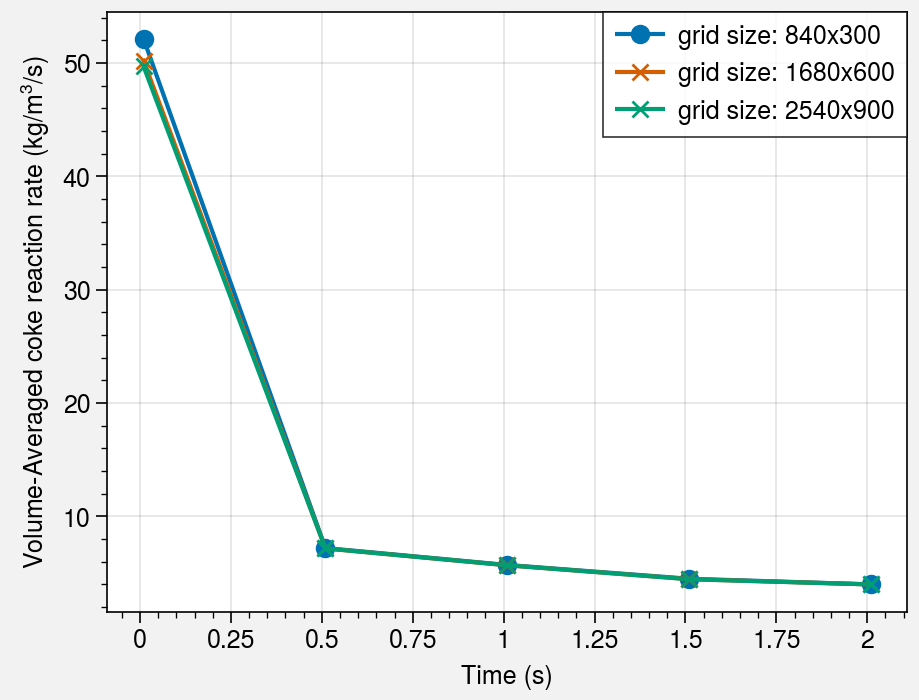

In [7]:
df_rate0=pd.read_csv("./T773_Pe1e-2_medium_rawMesh/postProcess/others/ReactionRateAndBurningRate.csv")
df_rate1=pd.read_csv("./T773_Pe1e-2_medium_finer2/postProcess/others/ReactionRateAndBurningRate.csv")
df_rate2=pd.read_csv("./T773_Pe1e-2_medium_finer3/postProcess/others/ReactionRateAndBurningRate.csv")

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(df_rate0["time"],df_rate0["vol_averaged_reaction_rate"],label="grid size: 840x300",marker="o")
ax.plot(df_rate1["time"],df_rate1["vol_averaged_reaction_rate"],label="grid size: 1680x600",marker="x")
ax.plot(df_rate2["time"],df_rate2["vol_averaged_reaction_rate"],label="grid size: 2540x900",marker="x")

ax.format(ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)", xlabel="Time (s)")
ax.legend(ncol=1)

In [8]:
value=list(df_rate0[df_rate0["time"]==1.01]["vol_averaged_reaction_rate"])[0]
benchmark=list(df_rate2[df_rate2["time"]==1.01]["vol_averaged_reaction_rate"])[0]

err_vol_averaged_reaction_rate=(value-benchmark)/benchmark
print(f"relative error of vol_averaged_reaction_rate: {err_vol_averaged_reaction_rate*100}%")

relative error of vol_averaged_reaction_rate: 0.46312587337659866%


In [9]:
fig.savefig("Volume-AveragedCokeReactionRate.jpg",bbox_inches='tight')

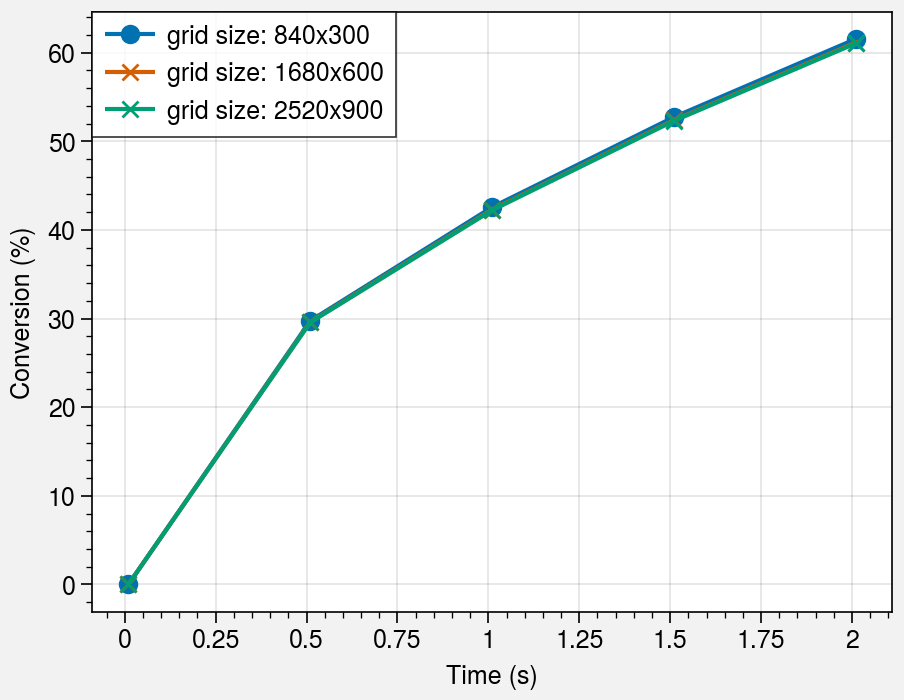

In [15]:

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(df_rate0["time"],df_rate0["burning_fraction"]*100,label="grid size: 840x300",marker="o")
ax.plot(df_rate1["time"],df_rate1["burning_fraction"]*100,label="grid size: 1680x600",marker="x")
ax.plot(df_rate2["time"],df_rate2["burning_fraction"]*100,label="grid size: 2520x900",marker="x")

ax.format(ylabel="Conversion (%)", xlabel="Time (s)")
ax.legend(ncol=1)

In [11]:
value=list(df_rate0[df_rate0["time"]==1.01]["burning_fraction"])[0]
benchmark=list(df_rate2[df_rate2["time"]==1.01]["burning_fraction"])[0]

err_burning_rate=(value-benchmark)/benchmark
print(f"relative error of burning rate: {err_burning_rate*100}%")

relative error of burning rate: 0.8243032091023379%


In [16]:
fig.savefig("Conversion.jpg",bbox_inches='tight')